In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sys, rospy, rosbag, glob, re

import scipy
import scipy.stats
from scipy.stats import pearsonr

from smap.msg import smapStats

import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import matplotlib

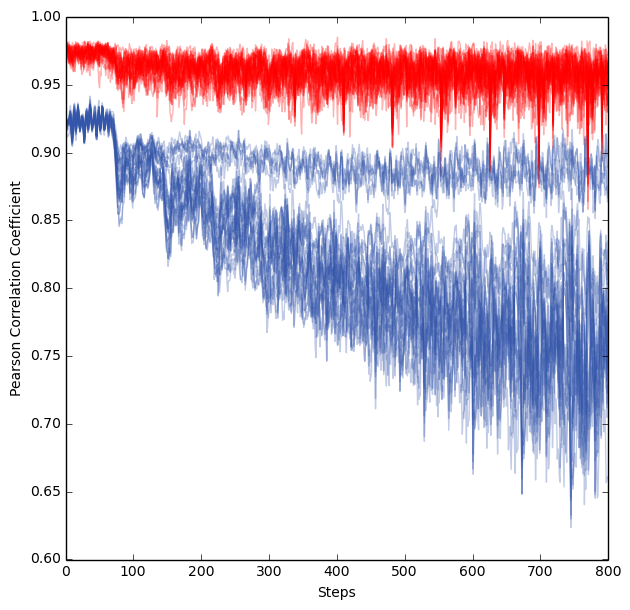

In [34]:
%matplotlib inline
fig, (ax) = plt.subplots(1, 1, figsize=(7, 7))
#plt.title("Pearson Correlation between True Absolute Error and Mapping Std Dev")
plt.xlabel("Steps")
plt.ylabel("Pearson Correlation Coefficient")

filenames = sorted(
    glob.glob("../build/ism_runs_old/*.bag"),
    key=lambda f: int(re.findall('([0-9]+)', f[len("../build/ism_runs_old/"):])[0]))

gradient = np.linspace(0, 0.99, len(filenames))
colors = [cm.jet(x) for x in gradient]
colors[-1] = "red"

inconsistencies = []
labels = []
errors = []
smapInconsistency = 0
smapError = 0
for rnd, filename in enumerate(filenames):
#     print "Computing mask from round %i..." % rnd
    bag = rosbag.Bag(filename)
    stats = None
    for _, msg, _ in bag.read_messages(topics=['stats']):
        stats = msg
    bag.close()
    if stats is None:
        continue
    voxels = stats.voxels

    steps = stats.step
    
    if stats.ismRampSize > .5:
        continue

    if rnd == 0:
        ax.plot(np.array(stats.stdErrorCorrelationBelief), alpha=0.3, color="r", label="SMAP")
        ax.plot(np.array(stats.stdErrorCorrelationLogOdds), alpha=0.3, color="#3355aa", label="Log Odds")
    else:
        ax.plot(np.array(stats.stdErrorCorrelationBelief), alpha=0.3, color="r")
        ax.plot(np.array(stats.stdErrorCorrelationLogOdds), alpha=0.3, color="#3355aa")
    # stats.stdErrorCorrelationLogOdds = np.array(stats.stdErrorCorrelationLogOdds)
    # last_finite = 1.
    # for i in range(len(stats.stdErrorCorrelationLogOdds)):
    #     if np.isfinite(stats.stdErrorCorrelationLogOdds[i]):
    #         last_finite = stats.stdErrorCorrelationLogOdds[i]
    #     else:
    #         stats.stdErrorCorrelationLogOdds[i] = last_finite

    # mask = np.isfinite(stats.stdErrorCorrelationLogOdds)

    #stats.stdErrorCorrelationLogOdds[~mask] = 0

    def moving_avg(array, n=200):
        return np.convolve([array[0]]*(n/2) + list(array) + [array[-1]]*(n/2), np.ones(n) / n)[int(n):]

    # smoothedCorrelationLogOdds = np.convolve(stats.stdErrorCorrelationLogOdds, np.ones(100) / 100)
    #mask = np.isfinite(smoothedCorrelationLogOdds)
    # ax.plot(moving_avg(stats.stdErrorCorrelationBelief), color="b", label="200 Point Moving Avg SMAP")
    # ax.plot(moving_avg(stats.stdErrorCorrelationLogOdds), color="g", label="200 Point Moving Avg Log Odds")
    #ax.legend(loc="lower right")
    #ax.set_xlim([0, 2000])#len(stats.stdErrorCorrelationBelief)])
ax.set_ylim([0.6, 1])
plt.savefig("pearson.png", dpi=280)

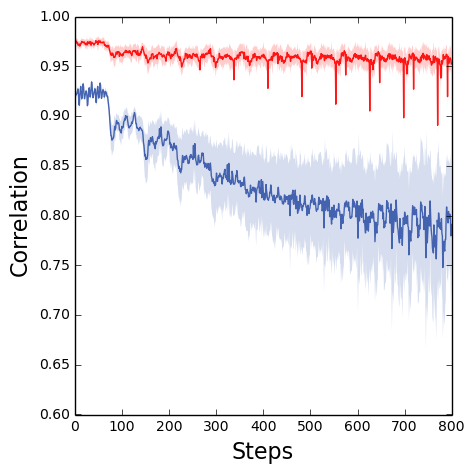

In [42]:
%matplotlib inline
fig, (ax) = plt.subplots(1, 1, figsize=(5, 5))
#plt.title("Pearson Correlation between True Absolute Error and Mapping Std Dev")
plt.xlabel("Steps")
plt.ylabel("Correlation")

filenames = sorted(
    glob.glob("../build/ism_runs_old/*.bag"),
    key=lambda f: int(re.findall('([0-9]+)', f[len("../build/ism_runs_old/"):])[0]))

gradient = np.linspace(0, 0.99, len(filenames))
colors = [cm.jet(x) for x in gradient]
colors[-1] = "red"

inconsistencies = []
labels = []
errors = []
smapInconsistency = 0
smapError = 0

pcc_smap = []
pcc_logodds = []


matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

for rnd, filename in enumerate(filenames):
#     print "Computing mask from round %i..." % rnd
    bag = rosbag.Bag(filename)
    stats = None
    for _, msg, _ in bag.read_messages(topics=['stats']):
        stats = msg
    bag.close()
    if stats is None:
        continue
    voxels = stats.voxels

    steps = stats.step
    
    if stats.ismRampSize > .5:
        continue

    # stats.stdErrorCorrelationLogOdds = np.array(stats.stdErrorCorrelationLogOdds)
    # last_finite = 1.
    # for i in range(len(stats.stdErrorCorrelationLogOdds)):
    #     if np.isfinite(stats.stdErrorCorrelationLogOdds[i]):
    #         last_finite = stats.stdErrorCorrelationLogOdds[i]
    #     else:
    #         stats.stdErrorCorrelationLogOdds[i] = last_finite

    # mask = np.isfinite(stats.stdErrorCorrelationLogOdds)

    #stats.stdErrorCorrelationLogOdds[~mask] = 0

    def moving_avg(array, n=200):
        return np.convolve([array[0]]*(n/2) + list(array) + [array[-1]]*(n/2), np.ones(n) / n)[int(n):]
    
    
    pcc_smap.append(np.array(stats.stdErrorCorrelationBelief))
    pcc_logodds.append(np.array(stats.stdErrorCorrelationLogOdds))
    
#     pcc_smap.append(moving_avg(stats.stdErrorCorrelationBelief))
#     pcc_logodds.append(moving_avg(stats.stdErrorCorrelationLogOdds))

    # smoothedCorrelationLogOdds = np.convolve(stats.stdErrorCorrelationLogOdds, np.ones(100) / 100)
    #mask = np.isfinite(smoothedCorrelationLogOdds)
    # ax.plot(moving_avg(stats.stdErrorCorrelationBelief), color="b", label="200 Point Moving Avg SMAP")
    # ax.plot(moving_avg(stats.stdErrorCorrelationLogOdds), color="g", label="200 Point Moving Avg Log Odds")
    #ax.legend(loc="lower right")
    #ax.set_xlim([0, 2000])#len(stats.stdErrorCorrelationBelief)])

    
pcc_smap = np.array(pcc_smap)
pcc_logodds = np.array(pcc_logodds)

x = list(range(len(pcc_smap[0])))

avg_smap = np.mean(pcc_smap, axis=0)
std_smap = np.std(pcc_smap, axis=0)

avg_logodds = np.mean(pcc_logodds, axis=0)
std_logodds = np.std(pcc_logodds, axis=0)

plt.fill_between(x, avg_smap - std_smap, avg_smap + std_smap, facecolor='r', alpha=0.2, edgecolor='none', antialiased=True)
ax.plot(avg_smap, alpha=0.9, color="r", label="CRM")
plt.fill_between(x, avg_logodds - std_logodds, avg_logodds + std_logodds, facecolor='#3355aa', alpha=0.2, edgecolor='none', antialiased=True)
ax.plot(avg_logodds, alpha=0.9, color="#3355aa", label="Log Odds")
#     ax.plot(np.array(stats.stdErrorCorrelationLogOdds), alpha=0.3, color="#3355aa", label="Log Odds")
# else:
#     ax.plot(np.array(stats.stdErrorCorrelationBelief), alpha=0.3, color="r")
#     ax.plot(np.array(stats.stdErrorCorrelationLogOdds), alpha=0.3, color="#3355aa")
ax.set_ylim([0.6, 1])
ax.set_xlim([0, steps])
plt.tight_layout()
plt.savefig("pearson.pdf")